In [51]:
from sage.calculus.desolvers import desolve_system_rk4
from scipy.constants import hbar,pi,m_e

In [54]:
# constants

omega_21 = pi**2 * hbar * 3 / 2 / m_e

# RWA constants

E0,L = 1,1

d = 9*pi**3 * hbar / 32

alpha = -d*E0*8*L**2 / 9 / pi**2

Omega = lambda det: sqrt(det**2 + alpha**2 / hbar**2)

In [3]:
# RWA probs

def prob_1(t,det):
    p1_1 = cos(Omega(det)*t/2)**2
    p1_2 = sin(Omega(det)*t/2)**2 * det**2 / Omega(det)**2
    
    return p1_1 + p1_2

def prob_2(t,det):
    
    return sin(Omega(det)*t/2)**2 * alpha**2 / (hbar**2 * Omega(det)**2)

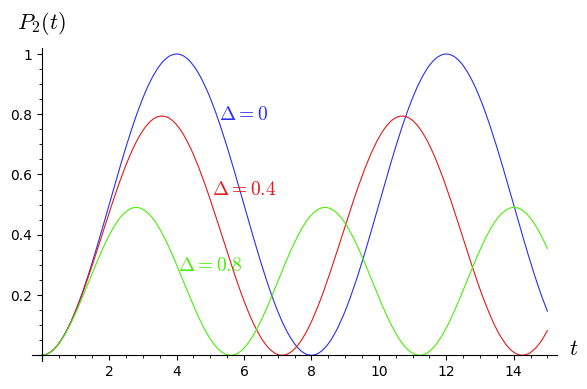

In [73]:
t = var('t')

p1 = plot(prob_2(t,0),(t,0,15),color='#2a2ef6',thickness=0.8)
p2 = plot(prob_2(t,0.4),(t,0,15),color='#e91717',thickness=0.8)
p3 = plot(prob_2(t,0.8),(t,0,15),color='#48ef06',axes_labels=['$t$','$P_2(t)$'],thickness=0.8)#,frame=True,axes=False)

t1 = text(r'$ \Delta = 0$', (6, 0.8),fontsize=14,color='#2a2ef6')
t2 = text(r'$ \Delta = 0.4$', (6, 0.55),fontsize=14,color='#e91717')
t3 = text(r'$ \Delta = 0.8$', (5, 0.3),fontsize=14,color='#48ef06')

show(p1+p2+p3+t1+t2+t3)

In [129]:
# non-RWA coupled system

omega = omega_21*500

print(abs(omega - omega_21))

def a1_dot(a1,b1,a2,b2,t):
    t1 = cos(omega*t)*cos(omega_21*t)*b2
    t2 = -cos(omega*t)*sin(omega_21*t)*a2
    
    return (t1 + t2)*alpha/hbar

def b1_dot(a1,b1,a2,b2,t):
    t1 = -cos(omega*t)*cos(omega_21*t)*a2
    t2 = -cos(omega*t)*sin(omega_21*t)*b2
    
    return (t1 + t2)*alpha/hbar

def a2_dot(a1,b1,a2,b2,t):
    t1 = cos(omega*t)*cos(omega_21*t)*b1
    t2 = cos(omega*t)*sin(omega_21*t)*a1
    
    return (t1 + t2)*alpha/hbar

def b2_dot(a1,b1,a2,b2,t):
    t1 = -cos(omega*t)*cos(omega_21*t)*a1
    t2 = cos(omega*t)*sin(omega_21*t)*b1
    
    return (t1 + t2)*alpha/hbar

0.8552217070697209


In [130]:
# nRWA integration

a1,b1,a2,b2,t = var('a1 b1 a2 b2 t')

P_d0 = desolve_system_rk4([a1_dot(a1,b1,a2,b2,t),b1_dot(a1,b1,a2,b2,t)\
                        ,a2_dot(a1,b1,a2,b2,t),b2_dot(a1,b1,a2,b2,t)]\
                       ,[a1,b1,a2,b2],ivar=t,ics=[0,1,0,0,0],end_points=[0,15],step=0.1)

# P_d1 = desolve_system_rk4([a1_dot(a1,b1,a2,b2,t),b1_dot(a1,b1,a2,b2,t)\
#                         ,a2_dot(a1,b1,a2,b2,t),b2_dot(a1,b1,a2,b2,t)]\
#                        ,[a1,b1,a2,b2],ivar=t,ics=[0,1,0,0,0],end_points=[0,15],step=0.05)

# P_d2 = desolve_system_rk4([a1_dot(a1,b1,a2,b2,t),b1_dot(a1,b1,a2,b2,t)\
#                         ,a2_dot(a1,b1,a2,b2,t,omega = omega_21+2),b2_dot(a1,b1,a2,b2,t,omega = omega_21+2)]\
#                        ,[a1,b1,a2,b2],ivar=t,ics=[0,1,0,0,0],end_points=[0,15],step=0.05)

In [131]:
P1_d0, P2_d0 = [],[]
# P1_d1, P2_d1 = [],[]
# P1_d2, P2_d2 = [],[]

t_steps = [0]

for lst in P_d0:
    P1_d0.append(lst[1]**2+lst[2]**2)
    P2_d0.append(lst[3]**2+lst[4]**2)
    t_steps.append(t_steps[-1] + 0.1)
    
# for lst in P_d1:
#     P1_d1.append(lst[1]**2+lst[2]**2)
#     P2_d1.append(lst[3]**2+lst[4]**2)
    
# for lst in P_d2:
#     P1_d2.append(lst[1]**2+lst[2]**2)
#     P2_d2.append(lst[3]**2+lst[4]**2)


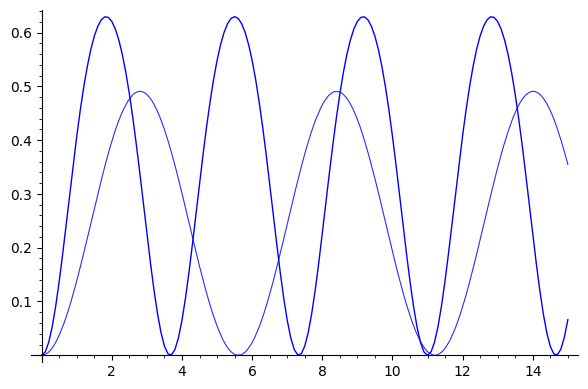

In [133]:
P2_rk4_d0 = list_plot(list(zip(t_steps,P2_d0)),plotjoined=True)
P2_rwk_d0 = plot(prob_2(t,0.8),(t,0,15),color='#2a2ef6',thickness=0.8)

show(P2_rwk_d0+P2_rk4_d0)

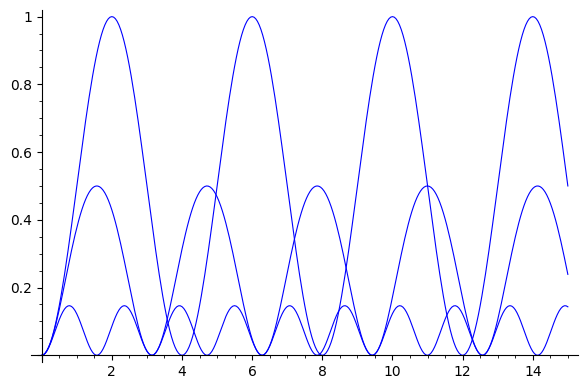

In [34]:
P2_rk4_d0 = list_plot(list(zip(t_steps,P2_d0)),plotjoined=True,thickness=0.8)
P2_rk4_d1 = list_plot(list(zip(t_steps,P2_d1)),plotjoined=True,thickness=0.8)
P2_rk4_d2 = list_plot(list(zip(t_steps,P2_d2)),plotjoined=True,thickness=0.8)

show(P2_rk4_d0+P2_rk4_d1+P2_rk4_d2)